# importing libraries

In [1]:
import pandas as pd
import numpy as np


In [2]:
import os
try:
    os.chdir("Desktop")
except:
    pass
os.listdir
    
    

<function nt.listdir(path=None)>

# importing dataset

In [3]:
df=pd.read_csv("CCPD.csv")
df.head().style.background_gradient(axis=0)

,AT,V,AP,RH,PE
0,8.340000,40.770000,1010.840000,90.010000,480.480000
1,23.640000,58.490000,1011.400000,74.200000,445.750000
2,29.740000,56.900000,1007.150000,41.910000,438.760000
3,19.070000,49.690000,1007.220000,76.790000,453.090000
4,11.800000,40.660000,1017.130000,97.200000,464.430000


# Define x and y

In [4]:
x=df.drop(['PE'],axis=1).values
y=df['PE'].values

In [5]:
x

array([[   8.34,   40.77, 1010.84,   90.01],
       [  23.64,   58.49, 1011.4 ,   74.2 ],
       [  29.74,   56.9 , 1007.15,   41.91],
       ...,
       [  15.99,   43.34, 1014.2 ,   78.66],
       [  17.65,   59.87, 1018.58,   94.65],
       [  23.68,   51.3 , 1011.86,   71.24]])

In [6]:
y

array([480.48, 445.75, 438.76, ..., 465.96, 450.93, 451.67])

# split dataset in training set and test set 

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

# Train model on the training set

In [8]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# predict the test set results

In [9]:
y_pred=model.predict(x_test)
print(y_pred)

[435.9108459  437.47373085 461.33293349 ... 434.64885808 438.97145247
 479.04986975]


In [10]:
model.predict([[8.34,40.77,1010.84,90.01]])

array([477.16154758])

# Evaluate the model

In [11]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9303315024744816

In [12]:
model.score(x_test,y_test)

0.9303315024744816

# visualize the predicted results

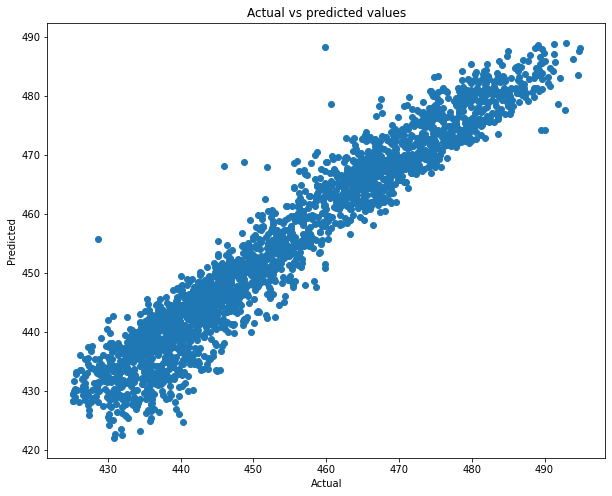

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs predicted values')
plt.show()

# predicted values

In [22]:
y_pred_df=pd.DataFrame({'actual values':y_test,'predicted values':y_pred,'difference':y_test-y_pred})
y_pred_df.head(20)

,actual values,predicted values,difference
0,433.27,435.910846,-2.640846
1,438.16,437.473731,0.686269
2,458.42,461.332933,-2.912933
3,480.82,476.114491,4.705509
4,441.41,435.880345,5.529655
5,454.75,459.296459,-4.546459
6,483.26,481.178158,2.081842
7,478.25,479.054261,-0.804261
8,434.16,439.510954,-5.350954
9,470.66,469.964813,0.695187


<AxesSubplot:>

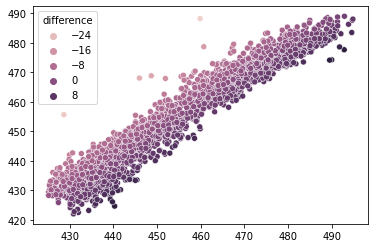

In [21]:
import seaborn as sns
difference=y_test-y_pred
sns.scatterplot(x=y_test,
               y=y_pred,
               hue='difference',
               data= y_pred_df)
